In [18]:
import pandas, numpy

In [14]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.6, 9 * 0.6)})

In [ ]:
# define profile of injections across batches for ISs. start with ISs and their corresponding metabolites


In [4]:
input_data_file = '/Users/adrian/gd15/research/vigur/data/targeted.2024.eva/EC_72_EVA_All_ION_MODES.xlsx'

# read information

## sample list

In [10]:
samplelist = pandas.read_excel(input_data_file, sheet_name='Sample list Alexia', skiprows=1, index_col=0)
samplelist

,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Unnamed: 7,Unnamed: 8,Unnamed: 9,Sample list from alexia
Sample ID,,,,,,,,,,
072-36,1,0,0 µM,1,C,248000.0,NaN,NaN,NaN,NaN
072-37,1,0,0 µM,2,C,248000.0,NaN,NaN,NaN,NaN
072-38,1,0,0 µM,3,C,248000.0,NaN,NaN,NaN,NaN
072-39,1,4,0µM,1,C,257000.0,NaN,NaN,NaN,NaN
072-40,1,4,0µM,2,C,257000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
072-244,3,24,5 µM epi:nor,2,C,340000.0,NaN,NaN,NaN,NaN
072-245,3,24,5 µM epi:nor,3,C,340000.0,NaN,NaN,NaN,NaN
072-246,3,24,TNFa,1,C,313000.0,NaN,NaN,NaN,NaN


In [12]:
basicdf = pandas.read_excel(input_data_file, sheet_name='BASIC_NEG', index_col='SAMPLE')
basicdf

,Sample,SHOT ORDER,LCMS_BATCH_Biological_replicate,TREATMENT,TIME,Cell Count,Technical replicate,Alanine IS,AMP IS,Citrate IS,...,Phosphoenolpyruvate,erythrose 4-phosphate,Citrate,hydroxyglutarate,Aspartate,glycerol phosphate,Adrenaline,Niacinamide,Tyrosine,N-acetyl Glutamate
SAMPLE,,,,,,,,,,,,,,,,,,,,,
Pool,Pool,1,1,NaN,NaN,NaN,NaN,865.404,69.021,1057.016,...,52.040,41.523,237.663,713.870,260.327,35.492,264.610,572.353,75.170,72.749
072-48,NEG_072-48_5 µM epi:nor_4,2,1,5 µM epi:nor,4.0,167000.0,1.0,0.473,226.107,93.586,...,82.744,77.874,157.720,116.584,468.921,8.897,283.618,0.000,91.716,184.931
072-52,NEG_072-52_TNFa_4,3,1,TNFa,4.0,226000.0,2.0,0.634,68.874,101.881,...,30.406,38.643,269.912,21.599,58.803,1.495,65.873,0.000,14.736,19.691
072-50,NEG_072-50_5 µM epi:nor_4,4,1,5 µM epi:nor,4.0,167000.0,3.0,0.907,466.702,49.439,...,4.890,54.335,290.670,100.339,471.287,11.992,306.999,23.383,84.216,154.960
072-59,NEG_072-59_5 µM epi_24,5,1,5 µM epi,24.0,249000.0,3.0,0.331,265.049,36.159,...,15.888,34.069,715.790,148.353,231.172,11.981,127.805,0.000,39.444,114.604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
072-220,NEG_072-220_0µM_4,121,3,0µM,4.0,280000.0,2.0,1166.587,0.000,3338.140,...,84.229,157.158,355.825,1636.135,690.943,67.524,494.379,917.419,168.979,53.133
072-237,NEG_072-237_5 µM epi_24,122,3,5 µM epi,24.0,331000.0,1.0,1146.403,2.487,3073.513,...,39.044,40.321,499.329,1883.490,313.692,164.787,504.568,874.164,153.535,60.082
072-244,NEG_072-244_5 µM epi:nor_24,123,3,5 µM epi:nor,24.0,340000.0,2.0,839.499,0.000,1936.300,...,31.896,12.872,243.476,757.205,213.700,11.635,107.549,701.609,21.406,45.572


In [46]:
samplelist.loc['072-48', 'Treatment']

'5 µM epi:nor'

In [59]:
color_map = {'5 µM epi:nor':'tab:red', 
            'TNFa':'tab:green',
            '5 µM epi':'tab:orange',
            '5 µM nor':'tab:purple',
            '0µM':'tab:blue',
            '0 µM':'tab:blue'}


for label in basicdf.index:
    if type(label) == str:
        if 'oo' not in label:
            treatment = samplelist.loc[label, 'Treatment']
            the_color = color_map[treatment]
        else:
            the_color = 'black'
    else:
        the_color = 'black'

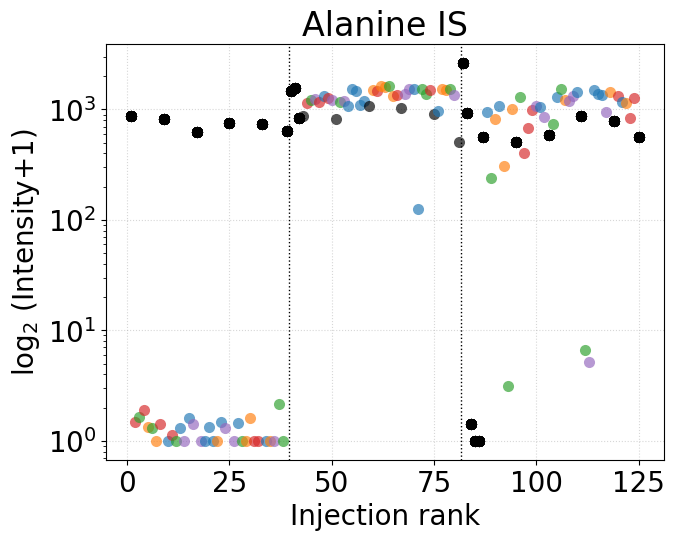

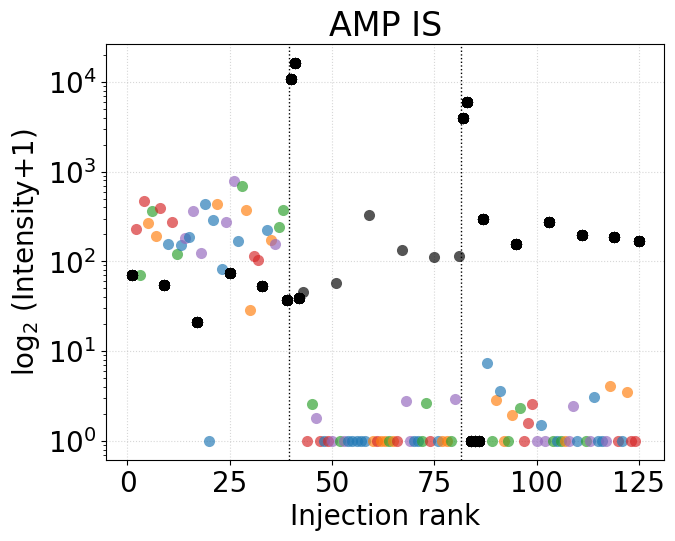

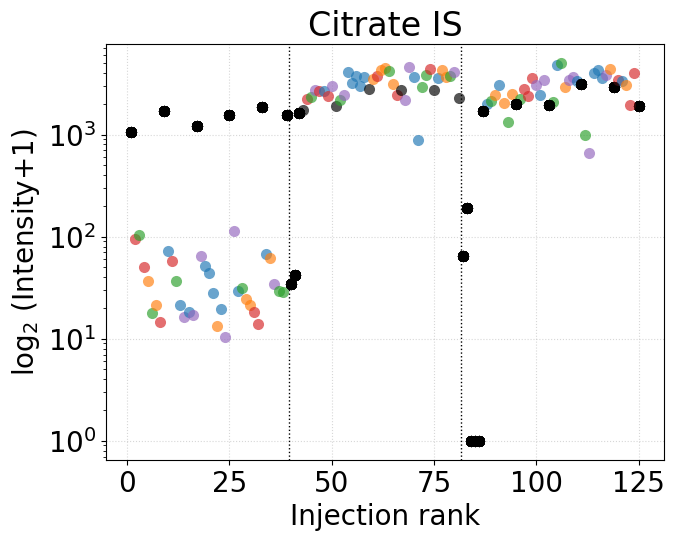

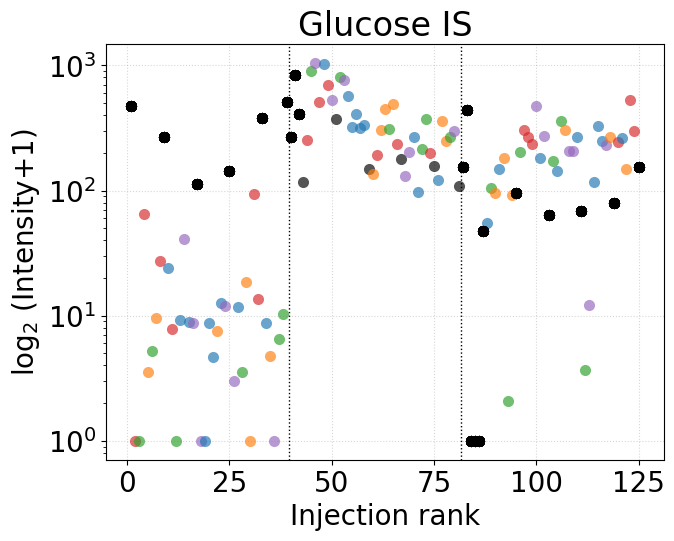

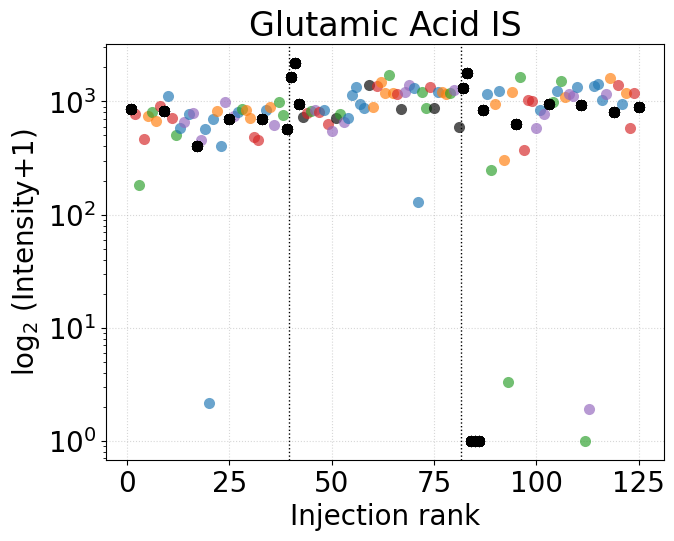

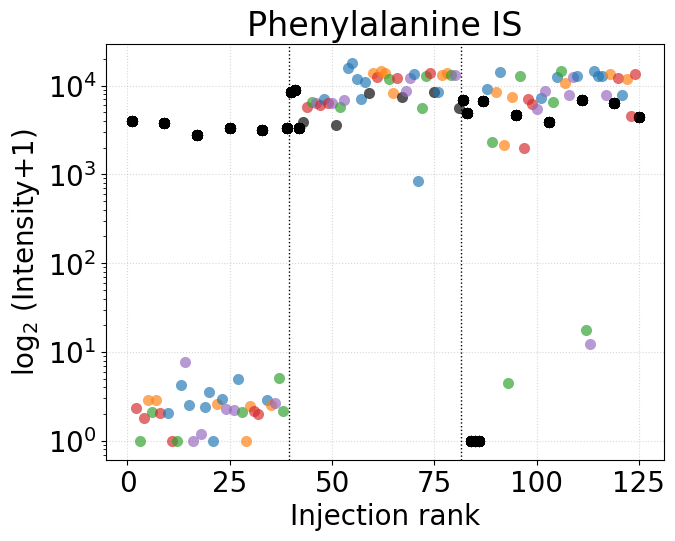

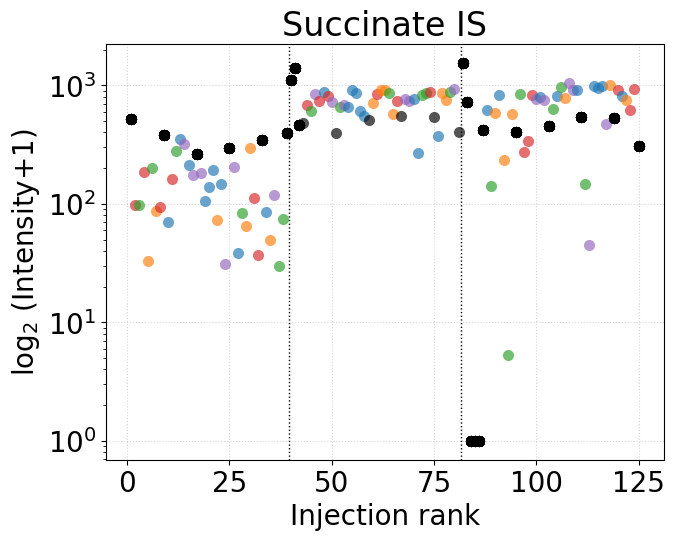

In [64]:
iss = [element for element in basicdf.columns if 'IS' in element]

for standard in iss:
    
    for id in basicdf.index:
        a = basicdf.loc[id, 'SHOT ORDER']
        b = basicdf.loc[id, standard] + 1
        # define color
        if type(id) == str:
            if 'oo' not in id:
                treatment = samplelist.loc[id, 'Treatment']
                the_color = color_map[treatment]
            else:
                the_color = 'black'
        else:
            the_color = 'black'
        # plot
        matplotlib.pyplot.semilogy(a, b, 'o', label=standard, ms=8, alpha=2/3, mew=0, color=the_color)

    # add batch borders: 39.5 and 81.5 are batch transition points
    matplotlib.pyplot.axvline(x=39.5, color='black', ls=':', lw=1)
    matplotlib.pyplot.axvline(x=81.5, color='black', ls=':', lw=1)

    #matplotlib.pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    matplotlib.pyplot.title(standard)
    matplotlib.pyplot.xlabel('Injection rank')
    matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
    matplotlib.pyplot.grid(alpha=0.5, ls=':')
    matplotlib.pyplot.show()

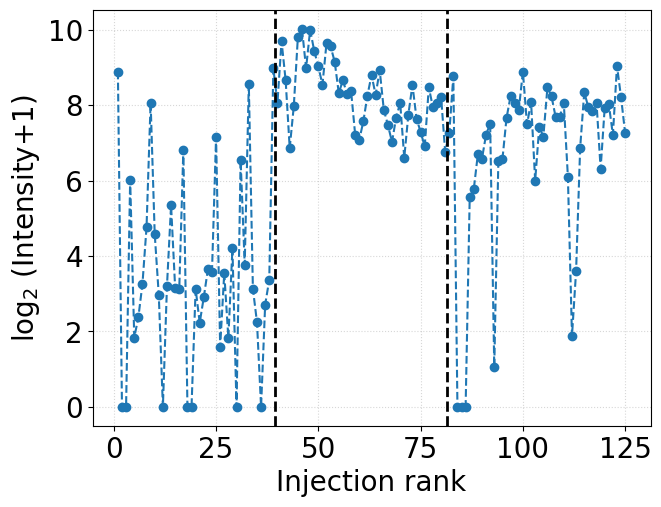

In [27]:
a = basicdf['SHOT ORDER']
b = numpy.log2(basicdf['Glucose IS']+1)
matplotlib.pyplot.plot(a, b, 'o--', label='Glucose IS')

# 39.5 and 81.5 are batch changes
matplotlib.pyplot.axvline(x=39.5, color='black', ls='--', lw=2)
matplotlib.pyplot.axvline(x=81.5, color='black', ls='--', lw=2)


matplotlib.pyplot.xlabel('Injection rank')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()